In [1]:
import pandas as pd
import missingno as msno
from fuzzywuzzy import fuzz
from unidecode import unidecode

c:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv(r'App\base.csv', sep = ';', encoding = 'latin1')

<ipython-input-2-dd13301c0222>:1: DtypeWarning: Columns (92,93,123,153,155,156,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'App\base.csv', sep = ';', encoding = 'latin1')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Columns: 352 entries, id to # Terapeutas Ocupacionais
dtypes: float64(172), int64(45), object(135)
memory usage: 56.5+ MB


In [12]:
df['cnes_string'] = df['cnes'].astype(str)
rst = df['cnes_string'].map(lambda calc: len(calc))
print("No. of characters in each word in the given series:")
rst.unique() #CNES FORMATO OK

No. of characters in each word in the given series:


array([7], dtype=int64)

In [16]:
df['CEP']

0        72215170
1        78563000
2         4026000
3        97501670
4         6020012
           ...   
21048     3311000
21049    17600100
21050    15890000
21051    13285220
21052    84265230
Name: CEP, Length: 21053, dtype: int64

In [15]:
list(df.columns)

['id',
 'cnes',
 'Nome Fantasia',
 'Razão Social',
 'Natureza Jurídica',
 'Natureza Jurídica Mantenedora',
 'CNPJ',
 'Tipo de Pessoa',
 'Nível de dependência',
 'Número do Alvará',
 'Data de expedição do Alvará',
 'Orgão expedidor Alvará',
 'Tipo de Unidade',
 'Subtipo de Unidade',
 'Logradouro',
 'Número do endereço',
 'CEP',
 'Regional de Saude',
 'Bairro',
 'Complemento',
 'Cod. Município',
 'Município',
 'UF',
 'Tipo de Gestão',
 'Telefone',
 'Sempre aberto?',
 'cód Motivo Desabilitação',
 'Motitivo desabilitação',
 'CPF Diretor',
 'Situação contrato formalizado',
 'Número de Desabilitação',
 'Data da Carga',
 'Data da origem da atualização',
 'Data da Atualização',
 'CNPJ MANTENEDORA',
 'NOME MANTENEDORA',
 'leitos_saude_mental',
 'leitos_saude_mental_SUS',
 'leitos_hospital_dia',
 'leitos_hospital_dia_SUS',
 'leitos_psiquiatria',
 'leitos_psiquiatria_SUS',
 'leitos_neurologia',
 'leitos_neurologia_SUS',
 'leitos_geriatria',
 'leitos_geriatria_SUS',
 'leitos_geriatria_dia',
 'leit

In [131]:
#CEP
df[['CEP','cep','gmapsAddress','gmapsPlusCode']][df['gmapsAddress'].notnull()]

,CEP,cep,gmapsAddress,gmapsPlusCode
140,60110110,60.170-311,"Rua Professor Dias da Rocha, 2192 - Dionísio T...","7G23+VP Dionísio Torres, Fortaleza - CE"
154,6708645,06.708-645,"R. José Félix de Oliveira, 1914 - Vila Santo A...","C5C7+Q9 Vila Santo Antônio, Cotia - SP"
857,74210240,74.210-240,"Av. T-3, 600 - St. Bueno, Goiânia - GO, 74215-095","8P48+RG St. Bueno, Goiânia - GO"
1003,30150270,30.130-050,"Praça da Bandeira, 170 - Mangabeiras, Belo Hor...","332H+FQ Mangabeiras, Belo Horizonte - MG"
1101,8710460,08.710-460,"R. Princesa Isabel de Bragança, 230 - Centro, ...","FRG3+H8 Centro, Mogi das Cruzes - SP"
...,...,...,...,...
20427,29980000,29.980-000,"R. Gil Veloso, 377 - Canário, Pinheiros - ES, ...","HQQQ+82 Pinheiros, Espírito Santo"
20601,70757510,70.757-510,Asa Norte Comércio Local Norte 110 BL A QUADRA...,NaN
20667,13500210,13.500-210,"R. 8, 2066 - Centro, Rio Claro - SP, 13500-271","HCWJ+WQ Centro, Rio Claro - SP"
20922,80420090,80.420-090,"Av. do Batel, 1868 - Loja 109 - Batel, Curitib...","HP45+MG Batel, Curitiba - PR"


In [132]:
df[['Nome Fantasia','fantasia']]

,Nome Fantasia,fantasia
0,CENTRAL IMAGEM CLINICA MEDICA,CENTRAL IMAGEM CLINICA MEDICA
1,CLINICA SAO MATHEUS,CLINICA SAO MATHEUS
2,INCREASING SERVICOS MEDICOS,INCREASING
3,DAIANNY MACEDO DE SOUSA REGO,NaN
4,PSPSICOLOGIA,NaN
...,...,...
21048,CLINICA PSICOLOGICA BEM VIVER,NaN
21049,MARIANA FERRUZZI ZOPOLATO ME,NaN
21050,CLINICA VIVER,CLINICA VIVER
21051,REENCONTRO,REENCONTRO


<AxesSubplot:>

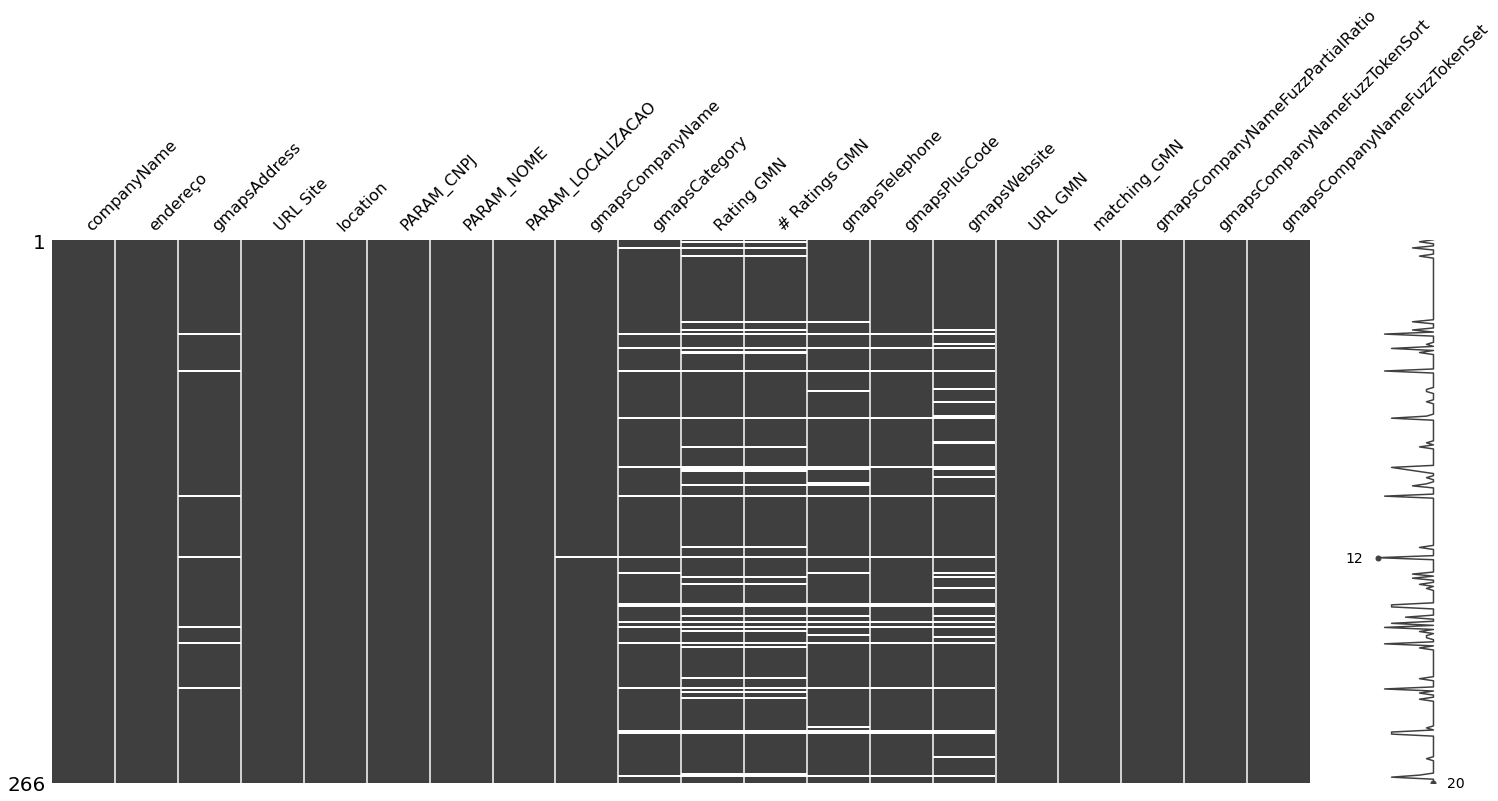

In [76]:
df_GMN = df[['companyName','endereço','gmapsAddress','URL Site','location','PARAM_CNPJ','PARAM_NOME','PARAM_LOCALIZACAO','gmapsCompanyName','gmapsCategory','Rating GMN','# Ratings GMN','gmapsTelephone','gmapsPlusCode','gmapsWebsite','URL GMN','matching_GMN','gmapsCompanyNameFuzzPartialRatio','gmapsCompanyNameFuzzTokenSort','gmapsCompanyNameFuzzTokenSet']][df['PARAM_CNPJ'].notna()]
msno.matrix(df_GMN)

In [77]:
df_GMN[['PARAM_NOME','gmapsCompanyName','matching_GMN','gmapsCompanyNameFuzzPartialRatio','gmapsCompanyNameFuzzTokenSort','gmapsCompanyNameFuzzTokenSet']]

,PARAM_NOME,gmapsCompanyName,matching_GMN,gmapsCompanyNameFuzzPartialRatio,gmapsCompanyNameFuzzTokenSort,gmapsCompanyNameFuzzTokenSet
140,CLINICA GAIA PSICOLOGIA E ESPECIALIDADE MEDICAS,CLINICA GAIA - Psicologia e Especialidades Me...,94.0,94.0,99.0,99.0
154,VILA VIDA SERVICOS MEDICOS LTDA,Vila Vida Serviços Médicos Ltda,95.0,100.0,100.0,100.0
857,CLINICA DE REPOUSO BOM JESUS,Clínica Bom Jesus,71.0,65.0,76.0,100.0
1003,CLINICA MOURAO,Clínica Mourão,90.0,100.0,100.0,100.0
1101,NISE NUCLEO EM SAUDE MENTAL LTDA,Nise - Núcleo em Saúde Mental,88.0,89.0,92.0,100.0
...,...,...,...,...,...,...
20427,SERTRA CENTER MED,SERTRA CENTERMED,89.0,94.0,97.0,97.0
20601,ESPACO LIBERTE,Asa Norte Comércio Local Norte 110 BL A QUADR...,23.0,43.0,27.0,27.0
20667,NAS NUCLEO DE ATENCAO A SAUDE,Unimed Rio Claro - Núcleo de Atenção à Saúde,74.0,90.0,70.0,93.0
20922,INC PATIO BATEL,L'occitane,29.0,32.0,32.0,32.0


In [78]:
df_GMN[['companyName','gmapsCompanyName','gmapsAddress','gmapsTelephone']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 140 to 21000
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   companyName       266 non-null    object 
 1   gmapsCompanyName  265 non-null    object 
 2   gmapsAddress      259 non-null    object 
 3   gmapsTelephone    241 non-null    float64
dtypes: float64(1), object(3)
memory usage: 10.4+ KB


In [126]:
df[['CNPJ','cnes']].info()
# df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CNPJ    21053 non-null  object
 1   cnes    21053 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 329.1+ KB


In [ ]:
dfzinho = df[['CNPJ','cnes','Razão Social']]
dfzinho['CNPJ_Count'] = df['CNPJ'].str.len()

In [ ]:
dfzinho['CNPJ_Count'].describe()

In [ ]:
dfzinho[dfzinho['CNPJ_Count']==7]

In [ ]:
# 44.999.987/0001-75 - WB PSICOLOGIA INTEGRADA LTDA
# 25.000.021/0001-38 - J ABELARDO SANCHES FILHO CLINICA ME

In [ ]:
# pd.DataFrame({'colunas':list(df.columns)}).to_excel('df_colunas21k.xlsx')

In [ ]:
df['funci_interesse']

In [ ]:
list(df.columns)

In [ ]:
dict_col_name = pd.read_excel('bases_download_novos nomes_220513.xlsx')
dict_col_name = dict_col_name[(dict_col_name['coluna']!='x')&(dict_col_name['coluna']!=dict_col_name['new name'])&(dict_col_name['coluna'].notna())]
dict_col_name = dict_col_name.set_index('coluna')['new name'].to_dict()
dict_col_name

In [ ]:
teste_dict = {'complemento': 'complemento RF','CEP': 'CEP CNES'}
df.rename(columns=dict_col_name,inplace=True)
list(df.columns)